### 针对Kaggle的猫、狗数据，训练一个模型做分类

## Data Preparation

### define data dir

In [18]:
import os
base_dir = 'E:\Data\CatsDogs\ForWork'
train_dir = base_dir + '\\train'
validation_dir = base_dir + '\\validation'
train_dogs_dir = base_dir + '\\train\dogs'
train_cats_dir = base_dir + '\\train\cats'
test_dogs_dir = base_dir + '\\test\dogs'
test_cats_dir = base_dir + '\\test\cats'
validation_dogs_dir = base_dir + '\\validation\dogs'
validation_cats_dir = base_dir + '\\validation\cats'

### load data in generator form

In [22]:
from keras.preprocessing.image import ImageDataGenerator

# 0~255缩放到0~1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# 从train目录进行load，则自动分为了2类
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Model build

In [30]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [31]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [32]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6924 - acc: 0.5405 - val_loss: 0.6810 - val_acc: 0.5740
Epoch 2/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6562 - acc: 0.6240 - val_loss: 0.6439 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6101 - acc: 0.6635 - val_loss: 0.6317 - val_acc: 0.6450
Epoch 4/30
100/100 [==============================] - 7s 73ms/step - loss: 0.5703 - acc: 0.6970 - val_loss: 0.6008 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 7s 73ms/step - loss: 0.5475 - acc: 0.7075 - val_loss: 0.5870 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 7s 73ms/step - loss: 0.5244 - acc: 0.7355 - val_loss: 0.6157 - val_acc: 0.6510
Epoch 7/30
100/100 [==============================] - 7s 74ms/step - loss: 0.4964 - acc: 0.7580 - val_loss: 0.5765 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 8s 75ms/step -

### Draw train and validation loss

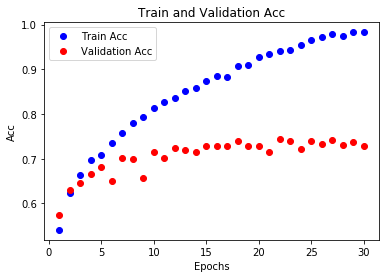

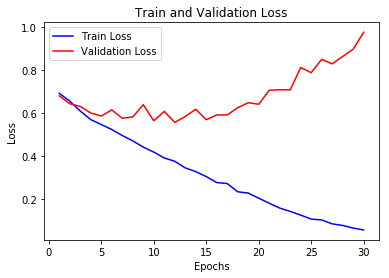

In [44]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoches = range(1, len(val_loss) + 1)

plt.plot(epoches, acc, 'bo', label='Train Acc')
plt.plot(epoches, val_acc, 'ro', label='Validation Acc')
plt.title("Train and Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.figure()
plt.plot(epoches, loss, 'b', label = 'Train Loss')
plt.plot(epoches, val_loss, 'r', label = 'Validation Loss')
plt.title("Train and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- 从图上可以看到，在训练到10个epochs之后，训练进入过拟合。在validation集合上loss迅速上升，acc基本不变。因此需要引入对数据的增强。

## Data Augmented

In [46]:
del model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# 增加了一个dropout层
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [47]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [51]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 27s 271ms/step - loss: 0.6511 - acc: 0.6175 - val_loss: 0.6563 - val_acc: 0.5984
Epoch 2/30
100/100 [==============================] - 25s 246ms/step - loss: 0.6330 - acc: 0.6384 - val_loss: 0.5899 - val_acc: 0.6791
Epoch 3/30
100/100 [==============================] - 26s 265ms/step - loss: 0.6158 - acc: 0.6581 - val_loss: 0.5786 - val_acc: 0.7056
Epoch 4/30
100/100 [==============================] - 25s 249ms/step - loss: 0.6040 - acc: 0.6762 - val_loss: 0.5694 - val_acc: 0.6991
Epoch 5/30
100/100 [==============================] - 26s 259ms/step - loss: 0.5898 - acc: 0.6919 - val_loss: 0.5481 - val_acc: 0.7170
Epoch 6/30
100/100 [==============================] - 26s 262ms/step - loss: 0.5907 - acc: 0.6859 - val_loss: 0.5501 - val_acc: 0.7191
Epoch 7/30
100/100 [==============================] - 26s 262ms/step - loss: 0.5743 - acc: 0.7013 - val_loss: 0.5367 - val_acc: 0.7164
Epoch 8/30
100/100 [==============================] - 2

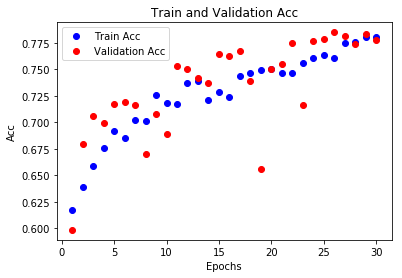

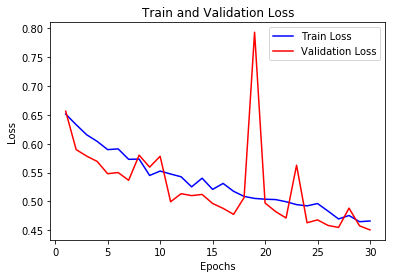

In [55]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoches = range(1, len(val_loss) + 1)

plt.plot(epoches, acc, 'bo', label='Train Acc')
plt.plot(epoches, val_acc, 'ro', label='Validation Acc')
plt.title("Train and Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.figure()
plt.plot(epoches, loss, 'b', label = 'Train Loss')
plt.plot(epoches, val_loss, 'r', label = 'Validation Loss')
plt.title("Train and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- 第11轮训练在validation set上的精度就超过了之前30轮的最后精度（因为之前的训练10轮之后就出现了过拟合）
- validation和train set上的acc基本同步上升，loss也基本同步下降，说明通过数据增强和dropout之后，训练没有出现过拟合。
- 同样的30轮后，validation set上的acc从72.9%上升到77.8%，有明显提升。


我们试一下继续训练70轮，达到100轮的结果

In [56]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=70,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/70
100/100 [==============================] - 28s 275ms/step - loss: 0.4755 - acc: 0.7719 - val_loss: 0.5916 - val_acc: 0.7100
Epoch 2/70
100/100 [==============================] - 25s 247ms/step - loss: 0.4656 - acc: 0.7816 - val_loss: 0.4958 - val_acc: 0.7558
Epoch 3/70
100/100 [==============================] - 24s 237ms/step - loss: 0.4596 - acc: 0.7838 - val_loss: 0.4756 - val_acc: 0.7665
Epoch 4/70
100/100 [==============================] - 24s 244ms/step - loss: 0.4495 - acc: 0.7822 - val_loss: 0.4863 - val_acc: 0.7713
Epoch 5/70
100/100 [==============================] - 24s 238ms/step - loss: 0.4571 - acc: 0.7772 - val_loss: 0.4573 - val_acc: 0.7805
Epoch 6/70
100/100 [==============================] - 28s 278ms/step - loss: 0.4612 - acc: 0.7775 - val_loss: 0.4529 - val_acc: 0.8041
Epoch 7/70
100/100 [==============================] - 24s 239ms/step - loss: 0.4459 - acc: 0.7906 - val_loss: 0.4710 - val_acc: 0.7779
Epoch 8/70
100/100 [==============================] - 2

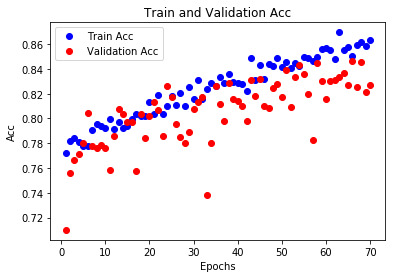

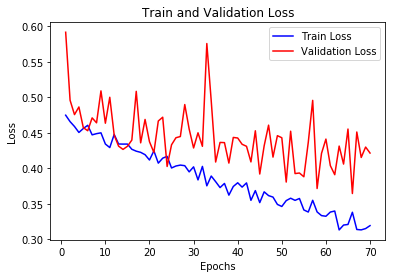

In [57]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoches = range(1, len(val_loss) + 1)

plt.plot(epoches, acc, 'bo', label='Train Acc')
plt.plot(epoches, val_acc, 'ro', label='Validation Acc')
plt.title("Train and Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.figure()
plt.plot(epoches, loss, 'b', label = 'Train Loss')
plt.plot(epoches, val_loss, 'r', label = 'Validation Loss')
plt.title("Train and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()